# RS/RSB transition and leaves
**GOAL**: observe differences, if any, in BP convergence in regimes with $f_3\neq 0$ with or without a small fraction of leaves

In [1]:
using OffsetArrays, Statistics
include("../code/bp_full.jl")
include("../code/bp.jl")

plot_rdb (generic function with 1 method)

## 1. No leaves

In [193]:
f1_0 = 0
f3 = 0.2
f2 = 1 - f1_0 -f3
Lambda = [f1_0,f2,f3]
K = [0,0,1]
n = 3000
nedges = Int(round(n*sum(i*l for (i,l) in pairs(Lambda)), digits=10))
m = Int(nedges/3);

In [194]:
# remove factors from matrix A until there is approx. a proportion f1 of leaves
function remove_factors(A, f1=1e-2)
    f = mean(isequal(1), sum(A,dims=1))
    while f < f1
        A = A[1:end-1,:]
        f = mean(isequal(1), sum(A,dims=1))
    end
    A
end

remove_factors (generic function with 2 methods)

In [206]:
Hs = 1.1:0.02:2.1
navg = 10
f1 = 1e-2

0.01

In [207]:
err0 = fill(NaN,navg,length(Hs))
d0 = fill(NaN,navg,length(Hs))
err1 = fill(NaN,navg,length(Hs))
d1 = fill(NaN,navg,length(Hs)) 

for i in 1:navg
    println("### Instance $i of $navg")
    # extract instance
    s = rand((-1,1), n)
    A0 = sparse(ldpc_matrix(n, m, nedges, Lambda, K, accept_multi_edges=false)')
    bp0 = BPFull(A0)
    A1 = remove_factors(A0, f1)
    bp1 = BPFull(A1)
    for (j,H) in pairs(Hs)
        println("H=$H. $j of ", length(Hs))
        flush(stdout)
        bp0.efield .= [(exp(ss*H),exp(-ss*H)) for ss in s]
        fill!(bp0.h, (.5,.5)); fill!(bp0.u, (.5,.5)), fill!(bp0.belief, (.5,.5))
        err0[i,j], _ = iteration!(bp0, tol=1e-20, maxiter=5*10^4, damp=0.5, rein=0.0)
        d0[i,j] = avg_dist(bp0,s)

        bp1.efield .= [(exp(ss*H),exp(-ss*H)) for ss in s]
        fill!(bp1.h, (.5,.5)); fill!(bp1.u, (.5,.5)), fill!(bp1.belief, (.5,.5))
        err1[i,j], _ = iteration!(bp1, tol=1e-20, maxiter=5*10^4, damp=0.5, rein=0.0)
        d1[i,j] = avg_dist(bp1,s)
    end
end

### Instance 1 of 10
H=1.1. 1 of 51
H=1.12. 2 of 51
H=1.14. 3 of 51
H=1.16. 4 of 51
H=1.18. 5 of 51
H=1.2. 6 of 51
H=1.22. 7 of 51
H=1.24. 8 of 51
H=1.26. 9 of 51
H=1.28. 10 of 51
H=1.3. 11 of 51
H=1.32. 12 of 51
H=1.34. 13 of 51
H=1.36. 14 of 51
H=1.38. 15 of 51
H=1.4. 16 of 51
H=1.42. 17 of 51
H=1.44. 18 of 51
H=1.46. 19 of 51
H=1.48. 20 of 51
H=1.5. 21 of 51
H=1.52. 22 of 51
H=1.54. 23 of 51
H=1.56. 24 of 51
H=1.58. 25 of 51
H=1.6. 26 of 51
H=1.62. 27 of 51
H=1.64. 28 of 51
H=1.66. 29 of 51
H=1.68. 30 of 51
H=1.7. 31 of 51
H=1.72. 32 of 51
H=1.74. 33 of 51
H=1.76. 34 of 51
H=1.8. 36 of 51
H=1.82. 37 of 51
H=1.84. 38 of 51
H=1.86. 39 of 51
H=1.88. 40 of 51
H=1.9. 41 of 51
H=1.92. 42 of 51
H=1.94. 43 of 51
H=1.96. 44 of 51
H=1.98. 45 of 51
H=2.0. 46 of 51
H=2.02. 47 of 51
H=2.04. 48 of 51
H=2.06. 49 of 51
H=2.08. 50 of 51
H=2.1. 51 of 51
### Instance 2 of 10
H=1.1. 1 of 51
H=1.12. 2 of 51
H=1.14. 3 of 51
H=1.16. 4 of 51
H=1.18. 5 of 51
H=1.2. 6 of 51
H=1.22. 7 of 51
H=1.24. 8 of 51
H=

H=1.64. 28 of 51
H=1.66. 29 of 51
H=1.68. 30 of 51
H=1.7. 31 of 51
H=1.72. 32 of 51
H=1.74. 33 of 51
H=1.76. 34 of 51
H=1.78. 35 of 51
H=1.8. 36 of 51
H=1.82. 37 of 51
H=1.84. 38 of 51
H=1.86. 39 of 51
H=1.88. 40 of 51
H=1.9. 41 of 51
H=1.92. 42 of 51
H=1.94. 43 of 51
H=1.96. 44 of 51
H=1.98. 45 of 51
H=2.0. 46 of 51
H=2.02. 47 of 51
H=2.04. 48 of 51
H=2.06. 49 of 51
H=2.08. 50 of 51
H=2.1. 51 of 51


In [210]:
err0_avg = vec(mean(err0,dims=1))
err0_sd = vec(std(err0,dims=1)/sqrt(navg))
err1_avg = vec(mean(err1,dims=1))
err1_sd = vec(std(err1,dims=1)/sqrt(navg))
d0_avg = vec(mean(d0,dims=1))
d0_sd = vec(std(d0,dims=1)/sqrt(navg))
d1_avg = vec(mean(d1,dims=1))
d1_sd = vec(std(d1,dims=1)/sqrt(navg));

## Comparison

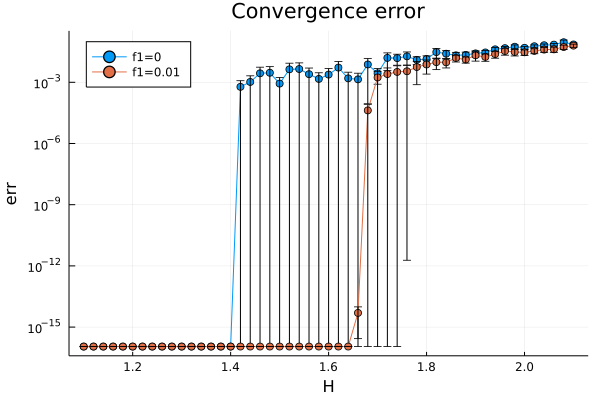

In [219]:
plot(Hs, err0_avg, yerr=err0_sd, marker=:circle, label="f1=$f1_0", yscale=:log10)
plot!(Hs, err1_avg, yerr=err1_sd, marker=:circle, label="f1=$f1_1", yscale=:log10)
xlabel!("H"); ylabel!("err"); title!("Convergence error")
plot!(legend=:topleft)

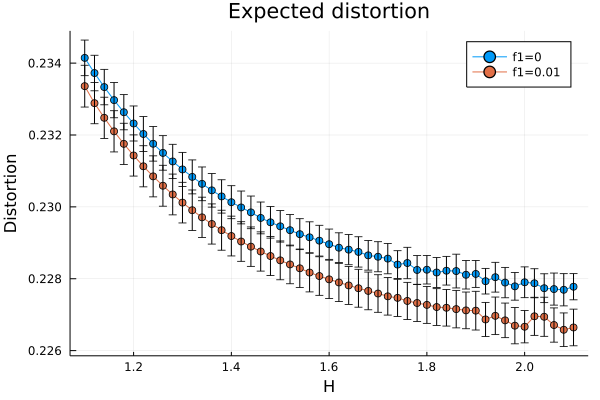

In [220]:
plot(Hs, d0_avg, yerr=d0_sd, marker=:circle, label="f1=$f1_0")
plot!(Hs, d1_avg, yerr=d1_sd, marker=:circle, label="f1=$f1_1")
xlabel!("H"); ylabel!("Distortion"); title!("Expected distortion")

In [223]:
B0,_ = findbasis(A0[1:end-1,:])
R0 = size(B0,2)/n

0.267

In [224]:
B1,_ = findbasis(A1)
R1 = size(B1,2)/n

0.27066666666666667

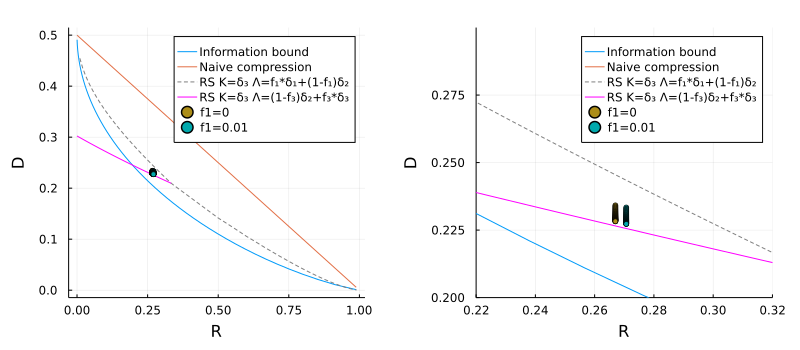

In [225]:
# c0 = cgrad(:heat, length(Hs)+1, categorical = true)
pp = plot_rdb()
# for (i,H) in enumerate(Hs)
#     scatter!(pp,fill(R0,nH),d0, ms=2, label="H=$H, f1=$f1_0", mc=c0[i])
# end
scatter!(pp,fill(R0,nH),d0_avg, ms=3, label="f1=$f1_0")
scatter!(pp,fill(R1,nH),d1_avg, ms=3, label="f1=$f1_1")
# plot!(pp, legend=:outertopright)
pp2 = deepcopy(pp)
ylims!((.2,.3)); xlims!((.22,.32))
plot(pp2,pp, size=(800,350), margins=5*Plots.mm)

## 2. Max-sum and f3 threshold

In [65]:
f1 = 0.0
f3s = LinRange(0.3, 0.5, 20)
navg = 20
Rho = [0,0,1]
n = 72000

72000

In [66]:
err = fill(NaN,navg,length(f3s))
f3_true = zero(f3s)

for (j,f3) in pairs(f3s)
    println("--- degree $j of $(length(f3s)): f1=$f1, f3 = $f3 ---")
    Lambda = [f1,1-f1-f3,f3]
    M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300)
    b = round(Int, n/N)
    M,N,NEDGES,RHO,LAMBDA = valid_degrees(Rho, Lambda, 300, B=b, tol=1e-3)
    f3_true[j] = LAMBDA[3]
    for i in 1:navg
#         println("### Instance $i of $navg")
        s = ones(Int, N)
        efield = [(si,-si) .- 1 for si in s]
        H = sparse(ldpc_matrix(N, M, NEDGES, LAMBDA, RHO, accept_multi_edges=false)')
        ms = BPFull(H, efield)
        err[i,j], _ = iteration!(ms, tol=1e-12, maxiter=500,
            update_f! = update_factor_ms!, update_v! = update_var_ms!)
    end
end

--- degree 1 of 20: f1=0.0, f3 = 0.3 ---
--- degree 2 of 20: f1=0.0, f3 = 0.31052631578947365 ---
--- degree 3 of 20: f1=0.0, f3 = 0.32105263157894737 ---
--- degree 4 of 20: f1=0.0, f3 = 0.331578947368421 ---
--- degree 5 of 20: f1=0.0, f3 = 0.3421052631578947 ---
--- degree 6 of 20: f1=0.0, f3 = 0.3526315789473684 ---
--- degree 7 of 20: f1=0.0, f3 = 0.3631578947368421 ---
--- degree 8 of 20: f1=0.0, f3 = 0.37368421052631573 ---
--- degree 9 of 20: f1=0.0, f3 = 0.38421052631578945 ---
--- degree 10 of 20: f1=0.0, f3 = 0.39473684210526316 ---
--- degree 11 of 20: f1=0.0, f3 = 0.4052631578947368 ---
--- degree 12 of 20: f1=0.0, f3 = 0.4157894736842105 ---
--- degree 13 of 20: f1=0.0, f3 = 0.4263157894736842 ---
--- degree 14 of 20: f1=0.0, f3 = 0.4368421052631579 ---
--- degree 15 of 20: f1=0.0, f3 = 0.4473684210526316 ---
--- degree 16 of 20: f1=0.0, f3 = 0.45789473684210524 ---
--- degree 17 of 20: f1=0.0, f3 = 0.46842105263157896 ---
--- degree 18 of 20: f1=0.0, f3 = 0.4789473684210

In [67]:
err_avg = vec(mean(err, dims=1))
err_std = vec(std(err, dims=1)) / sqrt(navg);

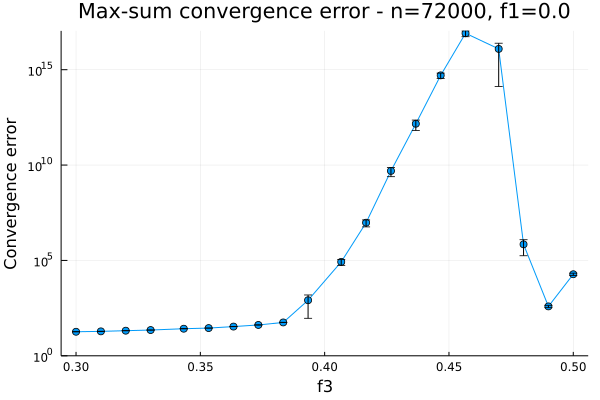

In [72]:
plot(f3_true, err_avg, m=:circle, yerr=err_std, label="", yaxis=(:log10,(1e-0,Inf)),
    xlabel="f3", ylabel="Convergence error")
title!("Max-sum convergence error - n=$n, f1=$f1")